In [1]:
import sys, os, git
import numpy as np
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path)
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries
path_figures = "/examples/"

In [3]:
def random_linear_generator(xmin=0, xmax=10, slope=0.3, alpha=0.1, pref = 1):
    x = np.linspace(xmin, xmax)
    y = slope*x + pref * (np.random.random(len(x))-0.5)*x**alpha
    return x, y

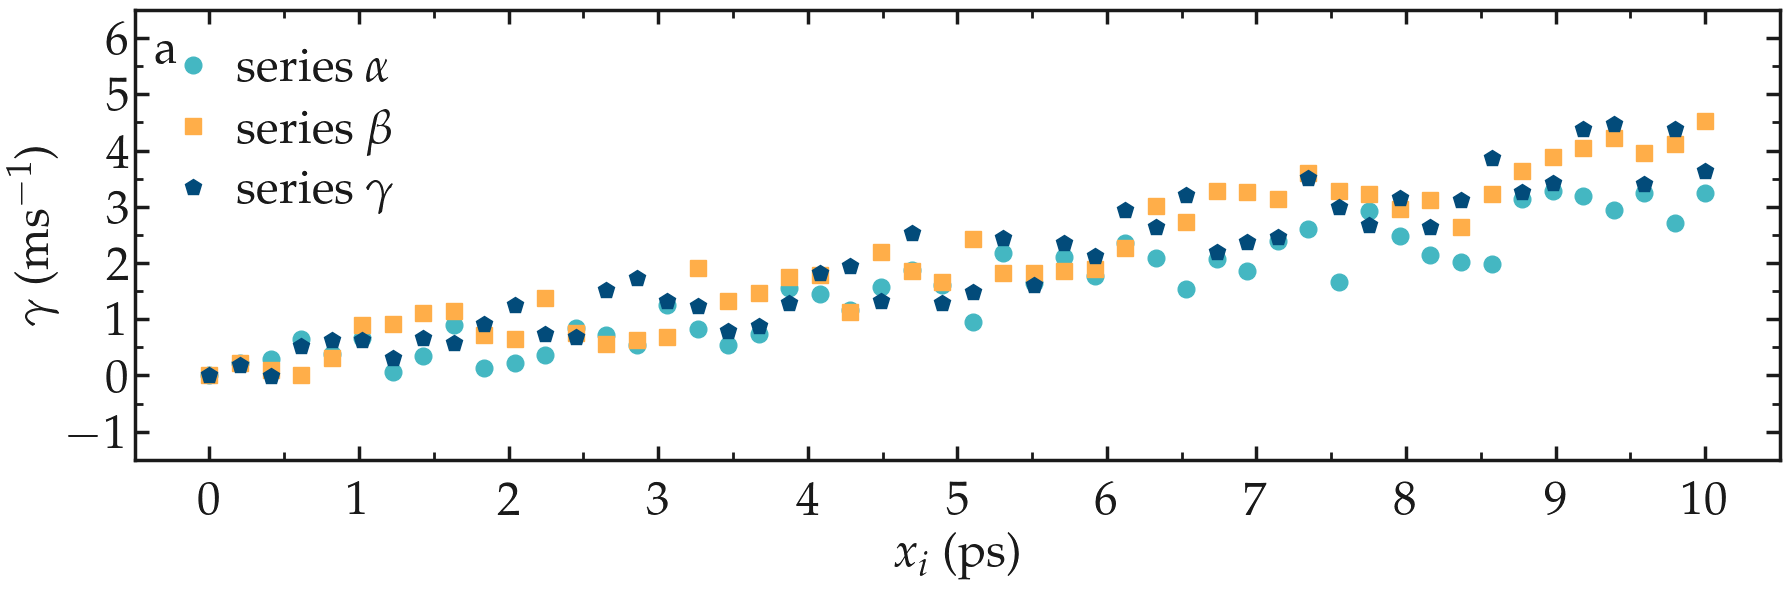

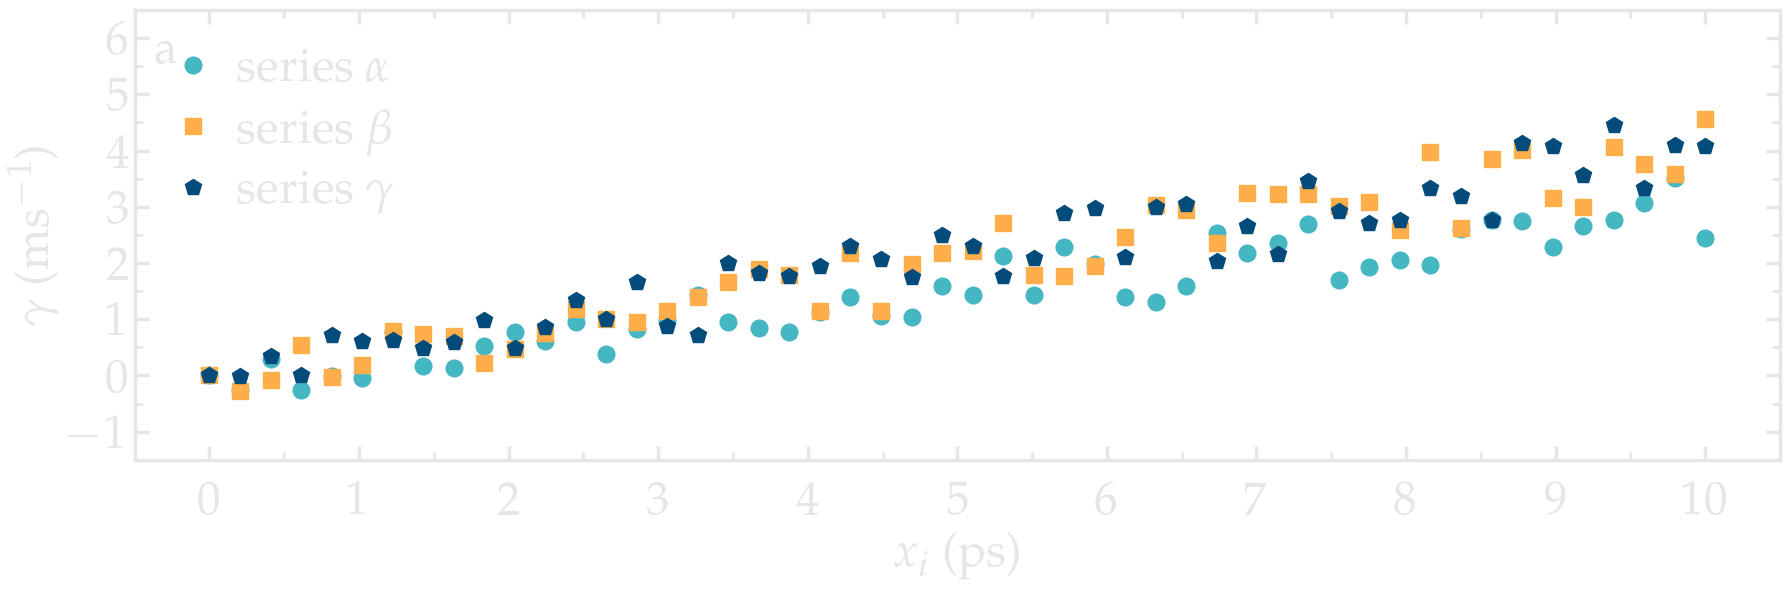

In [4]:
filename = "example-1"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x, y = random_linear_generator(slope = 0.3, alpha = 0.1)
    ax[-1].plot(x, y, 'o', color=colors["mycyan"],
                markersize = 12, linewidth=4, label=r'series $\alpha$')
    x, y = random_linear_generator(slope = 0.4, alpha = 0.2)
    ax[-1].plot(x, y, 's', color=colors["myorange"],
                markersize = 12, linewidth=4, label=r'series $\beta$')
    x, y = random_linear_generator(slope = 0.4, alpha = 0.2)
    ax[-1].plot(x, y, 'p', color=colors["mydarkblue"],
                markersize = 12, linewidth=4, label=r'series $\gamma$')
    complete_panel(ax[-1], r'$x_i$ (ps)', r'$\gamma$ (ms$^{-1}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(-0.5, 10.5), y_boundaries=(-1.5, 6.5),
                   x_ticks=np.arange(0, 11, 1), y_ticks=np.arange(-1, 7, 1)) 
    add_subplotlabels(fig, ax, ["a"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename, trans = False)

In [5]:
G_grive_08 = np.loadtxt("lennard-jones-fluid/Grivet2005/data-G/T0.8.dat")
G_grive_30 = np.loadtxt("lennard-jones-fluid/Grivet2005/data-G/T3.0.dat")

FileNotFoundError: lennard-jones-fluid/Grivet2005/data-G/T0.8.dat not found.

/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:119: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout()
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:121: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:125: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-dark.png",
/home/simon/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


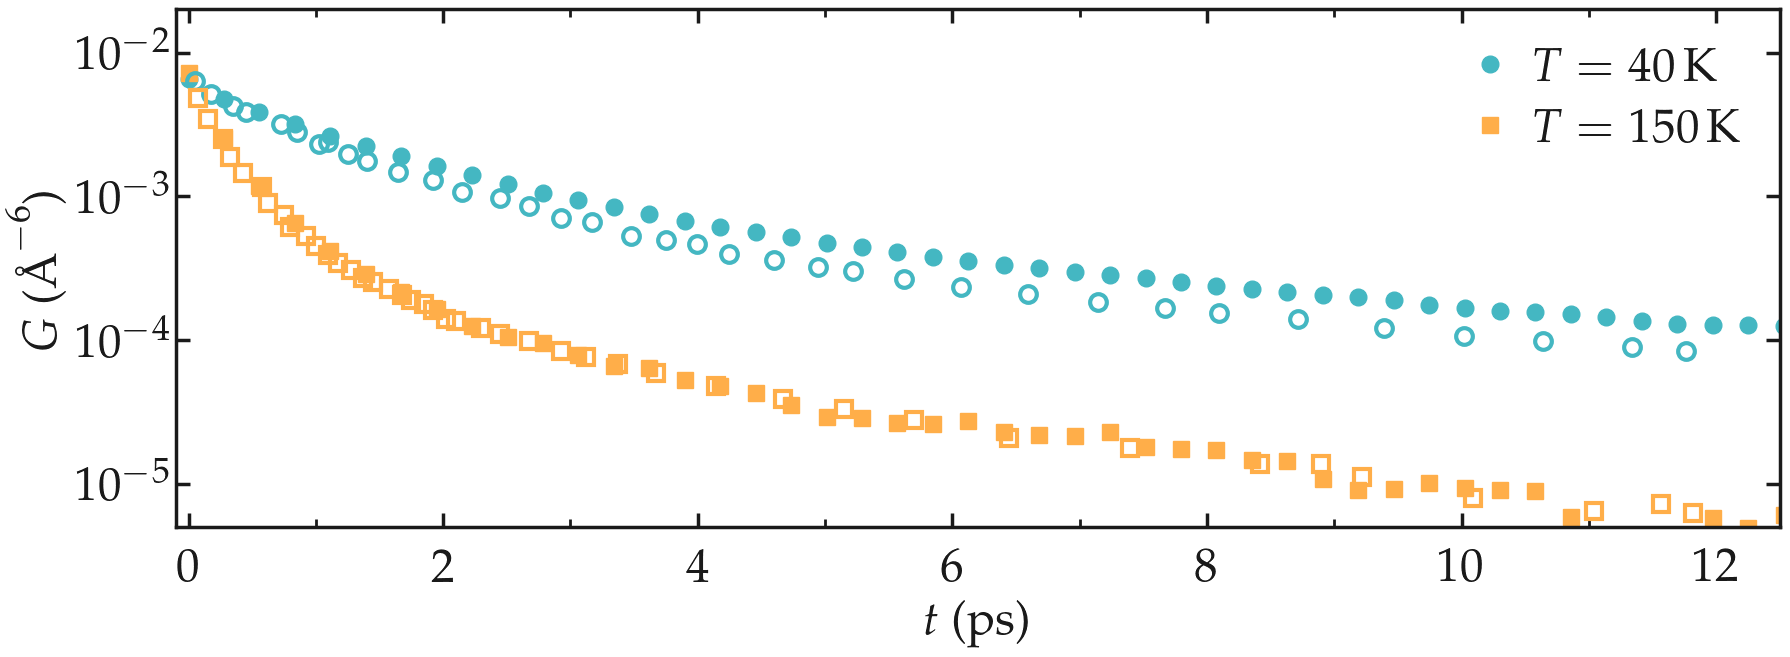

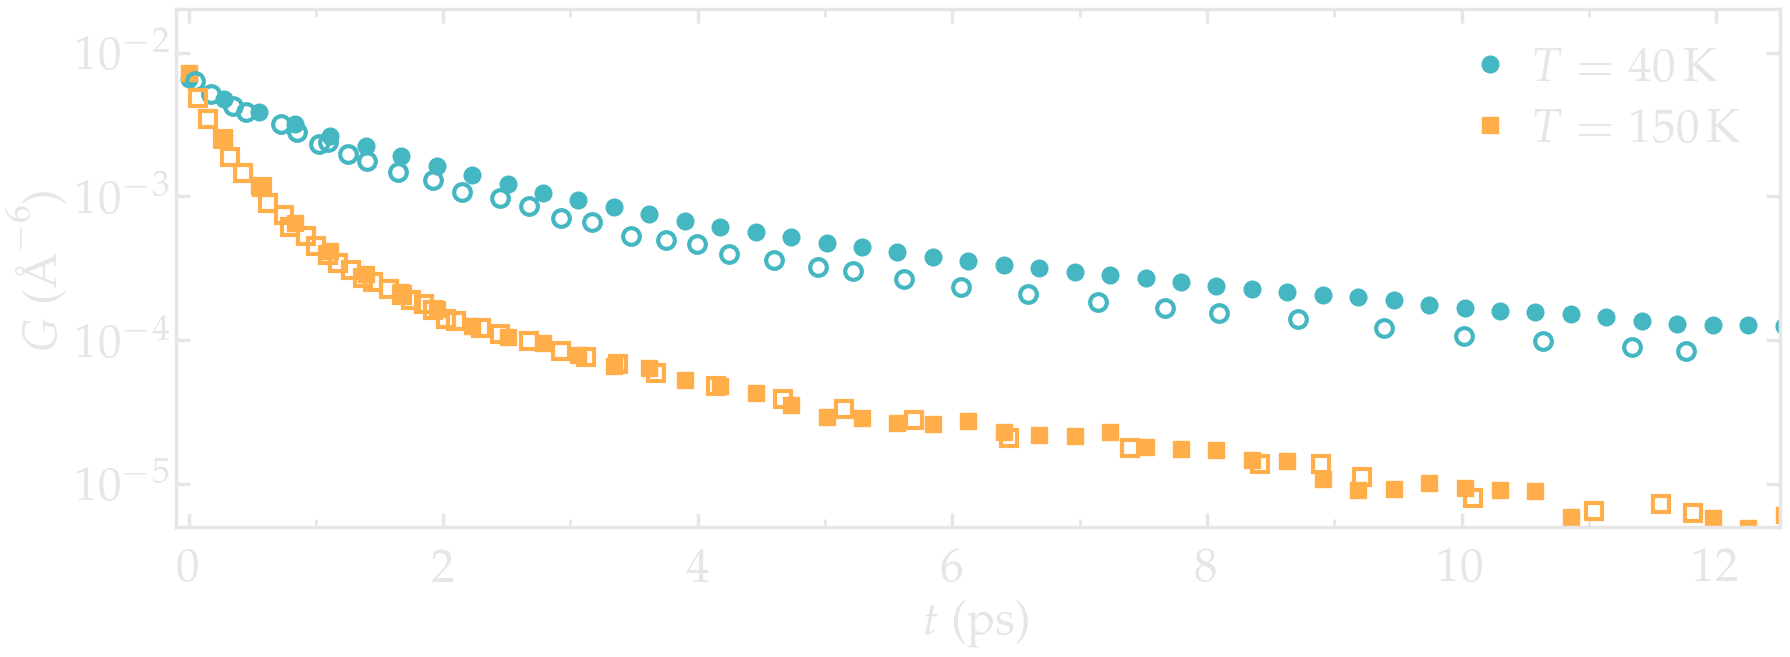

In [ ]:
filename = "G_correlation"
sigma = 3 # A
tconvert = 463.79e-15 # s
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    #print(all_T[1]*50, all_T[-2]*50)
    ax[-1].semilogy(t[::12], all_gij[1][::12], 'o', color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$T = 40$\,K')
    ax[-1].semilogy(t[::12], all_gij[-2][::12], 's', color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$T = 150$\,K')
    ax[-1].semilogy(G_grive_08.T[0]*(tconvert*1e12), G_grive_08.T[1]/(sigma)**6, 'o', mfc='none', markeredgewidth=3,
                    color=colors["mycyan"], markersize = 12, linewidth=4)
    ax[-1].semilogy(G_grive_30.T[0]*(tconvert*1e12), G_grive_30.T[1]/(sigma)**6, 's', mfc='none', markeredgewidth=3,
                    color=colors["myorange"], markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$t$ (ps)', r'$G$ ($\textrm{\AA}^{-6}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(-0.1, 12.5), y_boundaries=(5e-6, 2e-2)) # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)